In [8]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Layer
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

In [2]:
import os

In [3]:
os.chdir('C:\\Users\\kandanulus\\MyTestlab\\DPL\\Fraud')

In [4]:
pwd()

'C:\\Users\\kandanulus\\MyTestlab\\DPL\\Fraud'

In [14]:
df=pd.read_csv('creditcard.csv')

In [15]:
df.shape

(284807, 31)

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
df.isnull().values.any()

False

In [21]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

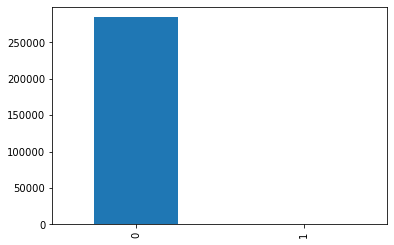

In [22]:
df['Class'].value_counts().plot(kind='bar')

In [24]:
fraud=df[df['Class']==1]
normal=df[df['Class']==0]

In [25]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [26]:
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [27]:
data=df.drop(['Time'],axis=1)

In [28]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
#normalization

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data['Amount']=sc.fit_transform(data['Amount'].values.reshape(-1,1))

In [30]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [31]:
#Prepare training Data&Test Data
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(data,test_size=0.2,random_state=42)

In [33]:
X_train=X_train[X_train['Class']==0]  # Normal Transactions

In [35]:
X_train=X_train.drop(['Class'],axis=1)

In [36]:
X_train.shape

(227451, 29)

(56962, 30)

In [39]:
# Prepare testdata
y_test=X_test['Class']
X_test=X_test.drop(['Class'],axis=1)

In [40]:
X_test.shape

(56962, 29)

In [45]:
from keras.models import Model,load_model
from keras.layers import Input,Dense
from keras import regularizers

In [49]:
# Create the multilayer Autoencoder

input_dim=X_train.shape[1]
input_layer=Input(shape=(input_dim,))
#encoder layer
encoder = Dense(14,activation='tanh',activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(7,activation='relu')(encoder)
#decoder
decoder=Dense(7,activation='tanh')(encoder)
decoder=Dense(14,activation='relu')(decoder)

r=Dense(input_dim,activation='sigmoid')(decoder)
ae=Model(inputs=input_layer,outputs=r)

In [50]:
ae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_7 (Dense)             (None, 14)                420       
                                                                 
 dense_8 (Dense)             (None, 7)                 105       
                                                                 
 dense_9 (Dense)             (None, 7)                 56        
                                                                 
 dense_10 (Dense)            (None, 14)                112       
                                                                 
 dense_11 (Dense)            (None, 29)                435       
                                                                 
Total params: 1,128
Trainable params: 1,128
Non-trainable par

In [51]:
# compile the model
ae.compile(optimizer='adam',
          loss='mse',
           metrics=['accuracy'])

In [53]:
epochs=20
batch_size=32
history=ae.fit(X_train,X_train,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(X_test,X_test),
              verbose=1)

Epoch 1/20
7108/7108 [==============================] - 17s 2ms/step - loss: 0.9145 - accuracy: 0.4403 - val_loss: 0.9003 - val_accuracy: 0.4770
Epoch 2/20
7108/7108 [==============================] - 14s 2ms/step - loss: 0.8603 - accuracy: 0.4981 - val_loss: 0.8785 - val_accuracy: 0.5117
Epoch 3/20
7108/7108 [==============================] - 17s 2ms/step - loss: 0.8438 - accuracy: 0.5310 - val_loss: 0.8647 - val_accuracy: 0.5386
Epoch 4/20
7108/7108 [==============================] - 16s 2ms/step - loss: 0.8320 - accuracy: 0.5589 - val_loss: 0.8546 - val_accuracy: 0.5638
Epoch 5/20
7108/7108 [==============================] - 16s 2ms/step - loss: 0.8245 - accuracy: 0.5580 - val_loss: 0.8499 - val_accuracy: 0.5460
Epoch 6/20
7108/7108 [==============================] - 16s 2ms/step - loss: 0.8206 - accuracy: 0.5603 - val_loss: 0.8463 - val_accuracy: 0.5550
Epoch 7/20
7108/7108 [==============================] - 16s 2ms/step - loss: 0.8180 - accuracy: 0.5659 - val_loss: 0.8438 - val_ac

In [54]:
ae.save('CreditcardAE.h5')

In [55]:
model=load_model('CreditcardAE.h5')

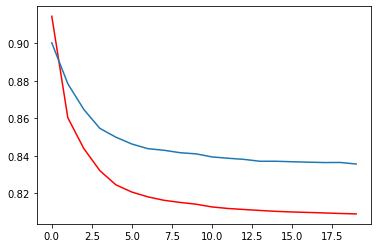

In [57]:
#plot the losses
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'])

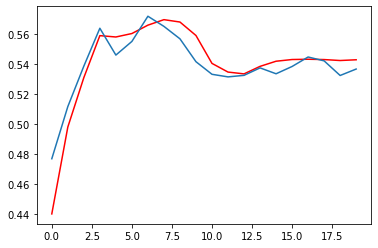

In [58]:
#plot the accuracy
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'])

In [59]:
#model prediction
pred=model.predict(X_test)

1781/1781 [==============================] - 2s 1ms/step


In [61]:
#MSE
mse=np.mean(np.power(X_test-pred,2),axis=1)

In [62]:
mse

43428     81.316590
49906      0.816921
29474      0.295503
276481     0.374650
278846     0.198355
            ...    
75723      0.700017
252263     0.198463
221246     0.620872
81910      0.127705
59490      2.146923
Length: 56962, dtype: float64

In [63]:
error_df=pd.DataFrame({'Recons_error':mse,'Actual_class':y_test})

In [64]:
error_df

,Recons_error,Actual_class
43428,81.316590,1
49906,0.816921,0
29474,0.295503,0
276481,0.374650,0
278846,0.198355,0
...,...,...
75723,0.700017,0
252263,0.198463,0
221246,0.620872,0
81910,0.127705,0


In [68]:
error_df['Actual_class'].value_counts()

0    56864
1       98
Name: Actual_class, dtype: int64

In [69]:
error_df[error_df['Actual_class']==1].value_counts()

Recons_error  Actual_class
113.619559    1               2
0.114477      1               1
14.900830     1               1
25.145772     1               1
24.663215     1               1
                             ..
4.807818      1               1
4.647262      1               1
4.450855      1               1
4.214562      1               1
263.247946    1               1
Length: 97, dtype: int64

In [70]:
error_df

,Recons_error,Actual_class
43428,81.316590,1
49906,0.816921,0
29474,0.295503,0
276481,0.374650,0
278846,0.198355,0
...,...,...
75723,0.700017,0
252263,0.198463,0
221246,0.620872,0
81910,0.127705,0


In [73]:
model.evaluate(X_test,X_test)

1781/1781 [==============================] - 4s 2ms/step - loss: 0.8356 - accuracy: 0.5367


[0.8355797529220581, 0.5366735458374023]